In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [61]:
# Data Cleaning
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

In [62]:
# Summary statistics
print("Customers:")
print(customers.info())
print(customers.describe())

print("Products:")
print(products.info())
print(products.describe())

print("Transactions:")
print(transactions.info())
print(transactions.describe())

Customers:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 7.8+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
Products:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    

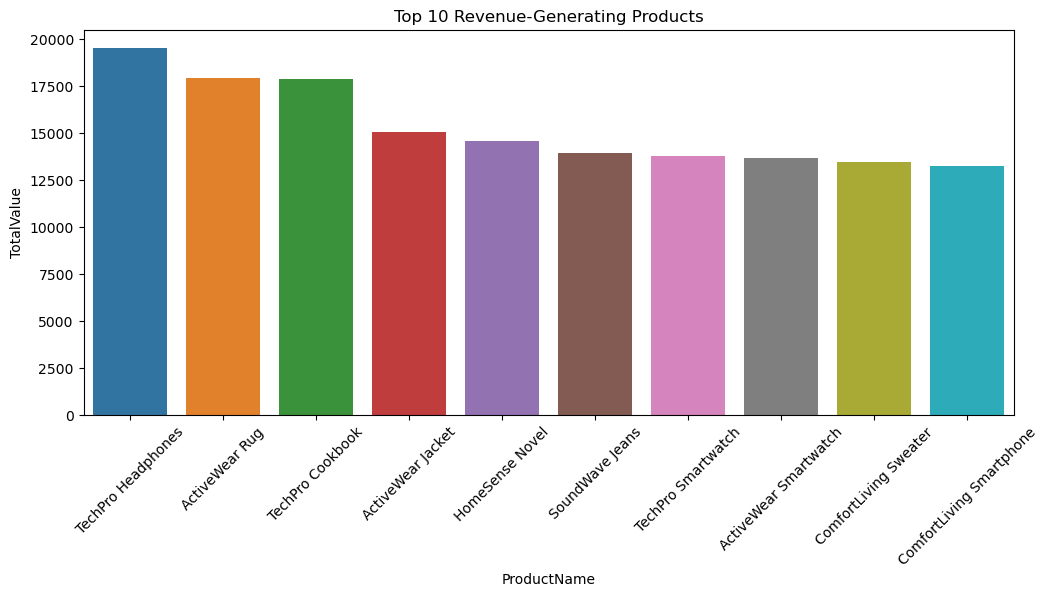

In [63]:
# Revenue per product
revenue_per_product = transactions.groupby("ProductID")["TotalValue"].sum().reset_index()
revenue_per_product = revenue_per_product.merge(products, on="ProductID")

top_products = revenue_per_product.sort_values("TotalValue", ascending=False).head(10)
plt.figure(figsize=(12, 5))
sns.barplot(x='ProductName', y='TotalValue', data=top_products)
plt.xticks(rotation=45)
plt.title("Top 10 Revenue-Generating Products")
plt.show()